In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



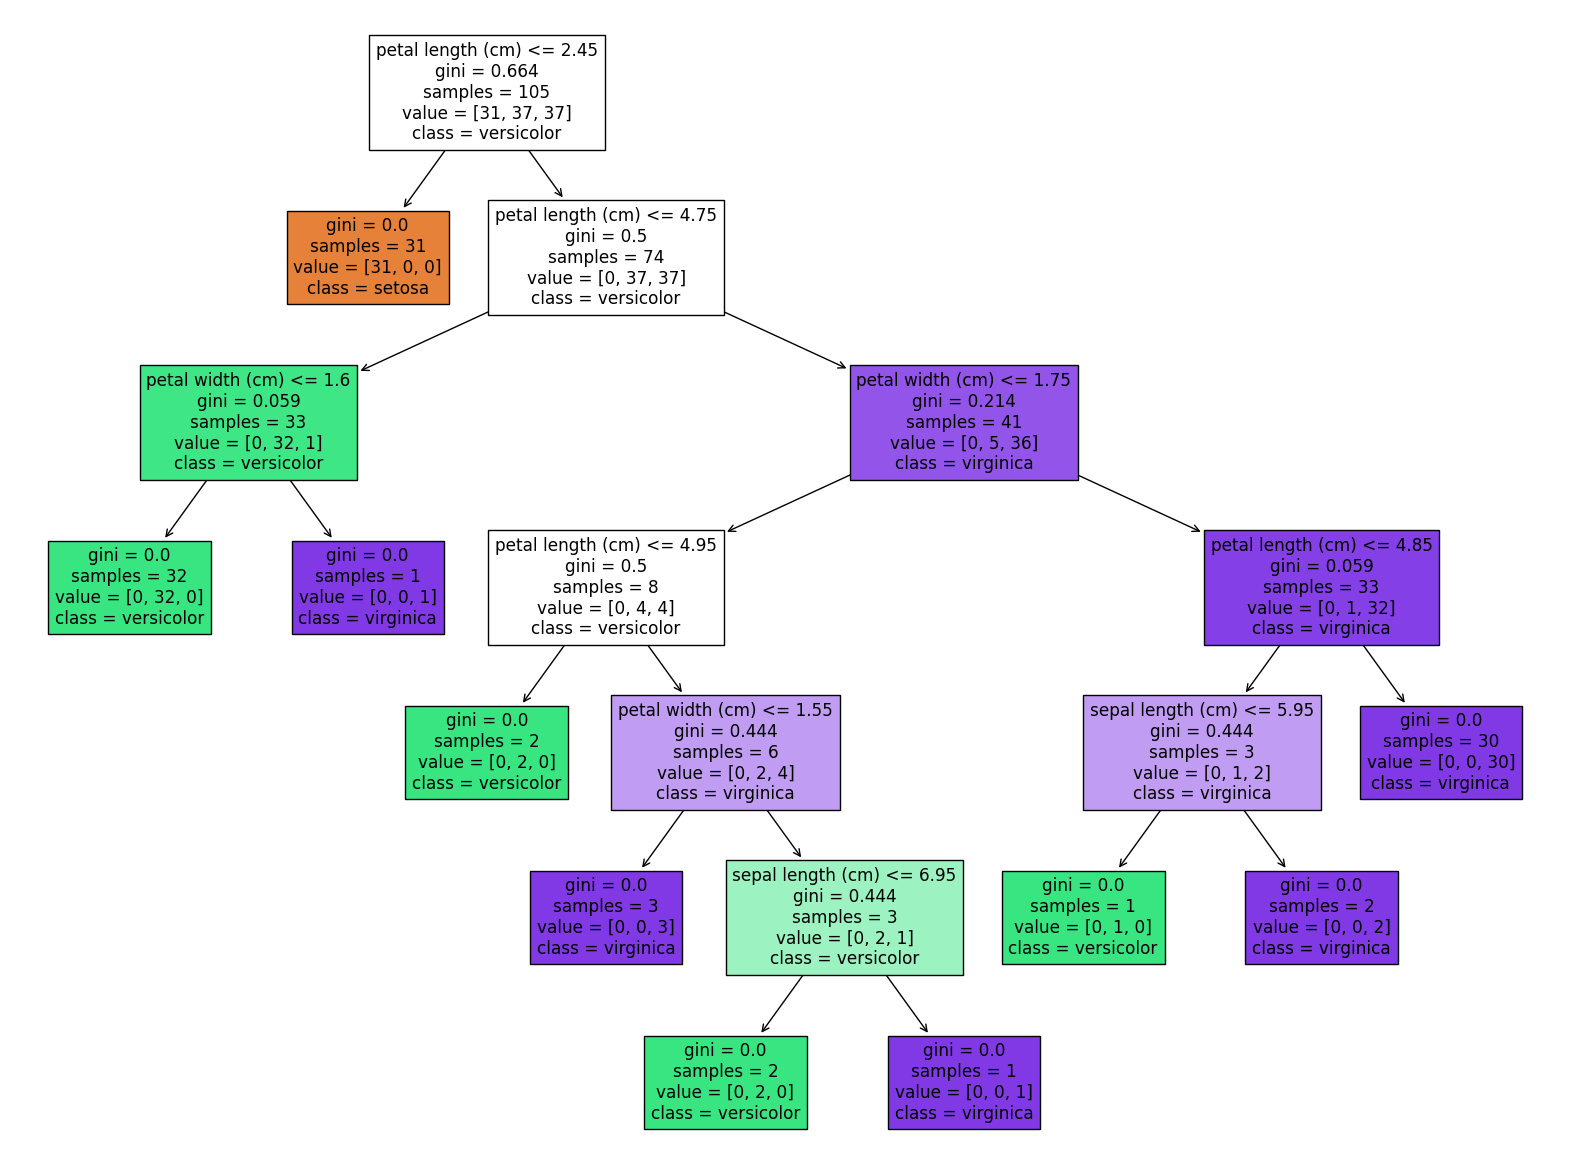

In [2]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## Decision Tree From Scratch

In [3]:
# Modified from - https://medium.com/@cristianleo120/master-decision-trees-and-building-them-from-scratch-in-python-af173dafb836

class Node:
    def __init__(self, value=None, feature=None, threshold=None, left=None, right=None):
        self.value = value
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right

class DecisionTree:
    def __init__(self):
        self.tree = None

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10)) # To deal with log0

    def information_gain(self, X, y, feature, threshold):
        mask = X[: ,feature] <= threshold
        left_conditional_entropy = self.entropy(y[mask])
        right_conditional_entropy = self.entropy(y[~mask])
        parent_entropy = self.entropy(y)
        p_left = sum(mask)/len(y)
        p_right = sum(~mask)/len(y)
        IG = parent_entropy - (p_left*left_conditional_entropy + p_right*right_conditional_entropy)
        return IG
    
    def gini_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return np.sum(probabilities*(1-probabilities))
    
    def gini_index(self, X, y, feature, threshold):
        mask = X[: ,feature] <= threshold
        left_gini_impurity = self.gini_impurity(y[mask])
        right_gini_impurity = self.gini_impurity(y[~mask])
        parent_gini_impurity = self.gini_impurity(y)
        p_left = sum(mask)/len(y)
        p_right = sum(~mask)/len(y)
        GI = parent_gini_impurity - (p_left*left_gini_impurity + p_right*right_gini_impurity)
        return GI
    
    def find_split(self, X, y):
        features = X.shape[1]
        best_feature = None
        best_threshold = None
        max_gain = -1

        for feature in range(features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                ### Use one of below to either use gini imputiry or entropy to see the difference
                #IG = self.information_gain(X, y, feature, threshold)
                IG = self.gini_index(X, y, feature, threshold)
                if IG > max_gain:
                    best_feature, best_threshold, max_gain = feature, threshold, IG
        return best_feature, best_threshold
        
    def build_tree(self, X, y):
        if len(np.unique(y)) == 1 :
            return Node(value=np.unique(y)[0])

        feature, threshold = self.find_split(X, y)
        
        mask = X[:, feature] <= threshold
        left = self.build_tree(X[mask], y[mask])
        right = self.build_tree(X[~mask], y[~mask])

        return Node(feature=feature, threshold=threshold, left=left, right=right)
    
    def prediction(self, X):
        node = self.tree
        while node.value == None:
            if X[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        pred = node.value
        return pred

    def predict(self, X):
        predictions = np.apply_along_axis(self.prediction, axis=1, arr=X)
        return predictions
     
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

In [4]:
model = DecisionTree()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [5]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, pred))

Accuracy: 95.56%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

